In [1]:
import numpy as np
from matplotlib import pyplot as plt
from Photochem import Atmosphere, zahnle_earth
from ruamel.yaml import YAML
yaml = YAML(typ='safe')
import subprocess

In [2]:
def P2alt(P):
    return np.interp(np.log10(P),\
                     np.log10(pc.wrk.pressure[::-1]/1e6),\
                     pc.var.z[::-1]/1e5)

In [3]:
subprocess.run("rm -rf ./planetary_atmosphere_observations".split())
subprocess.run("git clone --depth=1 https://github.com/Nicholaswogan/planetary_atmosphere_observations.git".split())
subprocess.run("rm -rf ./planetary_atmosphere_observations/.git".split())

CompletedProcess(args=['rm', '-rf', './planetary_atmosphere_observations/.git'], returncode=0)

In [4]:
from planetary_atmosphere_observations.utils import retrieve_species

# Earth

In [5]:
fil = open("planetary_atmosphere_observations/Earth.yaml",'r')
earth = yaml.load(fil)
fil.close()

In [6]:
pc = Atmosphere(zahnle_earth,\
                "../templates/ModernEarth/settings_ModernEarth.yaml",\
                "../templates/ModernEarth/Sun_now.txt",\
                "../templates/ModernEarth/atmosphere_ModernEarth.txt")

In [7]:
pc.var.atol = 1e-27
pc.initialize_stepper(pc.wrk.usol)
tn = 0
while tn<1e17:
    tn = pc.step()
pc.destroy_stepper()

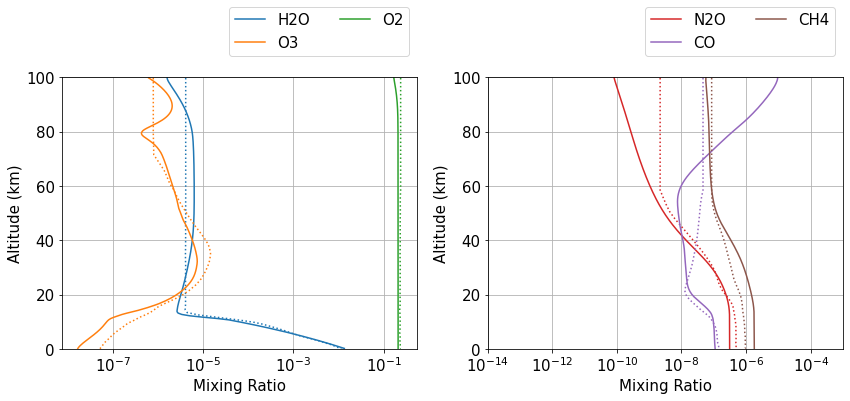

In [8]:
plt.rcParams.update({'font.size': 15})
fig,[ax,ax1] = plt.subplots(1,2,figsize=[14,5])
fig.patch.set_facecolor("w")

sol = pc.mole_fraction_dict()

species = ['H2O','O3','O2']
for i,sp in enumerate(species):
    ax.plot(sol[sp],sol['alt'],'C'+str(i)+'-',label=sp)
    entry = retrieve_species(sp,earth)
    for en in entry:
        alt = [P2alt(P) for P in en['P']]
        ax.plot(en['mix'],alt,'C'+str(i)+':')

ax.grid()
ax.set_ylim(0,100)
ax.set_xscale('log')
ax.legend(ncol=2,bbox_to_anchor=(1,1.05),loc='lower right')
ax.set_xlabel('Mixing Ratio')
ax.set_ylabel('Altitude (km)')

species = ['N2O','CO','CH4']
for i,sp in enumerate(species):
    ax1.plot(sol[sp],sol['alt'],'C'+str(i+3),label=sp)
    entry = retrieve_species(sp,earth)
    for en in entry:
        alt = [P2alt(P) for P in en['P']]
        ax1.plot(en['mix'],alt,'C'+str(i+3)+':')
    
ax1.grid()
ax1.set_ylim(0,100)
ax1.set_xlim(1e-14,1e-3)
ax1.set_xscale('log')
ax1.legend(ncol=2,bbox_to_anchor=(1,1.05),loc='lower right')
ax1.set_xlabel('Mixing Ratio')
ax1.set_ylabel('Altitude (km)')
    
plt.show()

# Mars

In [9]:
fil = open("planetary_atmosphere_observations/Mars.yaml",'r')
mars = yaml.load(fil)
fil.close()

In [10]:
pc = Atmosphere(zahnle_earth,\
                "../templates/Mars/settings_Mars.yaml",\
                "../templates/ModernEarth/Sun_now.txt",\
                "../templates/Mars/atmosphere_Mars.txt")

In [11]:
pc.var.atol = 1e-27
pc.initialize_stepper(pc.wrk.usol)
tn = 0
while tn<1e17:
    tn = pc.step()
pc.destroy_stepper()

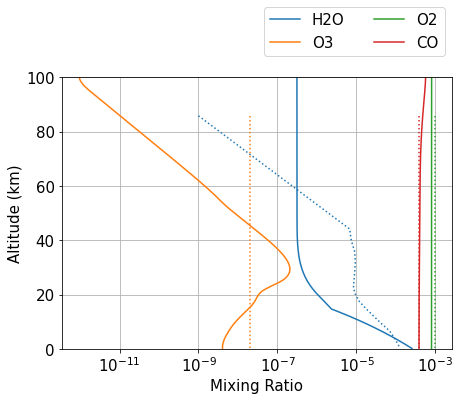

In [12]:
plt.rcParams.update({'font.size': 15})
fig,ax = plt.subplots(1,1,figsize=[7,5])
fig.patch.set_facecolor("w")

sol = pc.mole_fraction_dict()

species = ['H2O','O3','O2','CO']
for i,sp in enumerate(species):
    ax.plot(sol[sp],sol['alt'],'C'+str(i)+'-',label=sp)
    entry = retrieve_species(sp,mars)
    for en in entry:
        alt = [P2alt(P) for P in en['P']]
        ax.plot(en['mix'],alt,'C'+str(i)+':')

ax.grid()
ax.set_ylim(0,100)
ax.set_xscale('log')
ax.legend(ncol=2,bbox_to_anchor=(1,1.05),loc='lower right')
ax.set_xlabel('Mixing Ratio')
ax.set_ylabel('Altitude (km)')
    
plt.show()

# Titan

In [13]:
fil = open("planetary_atmosphere_observations/titan.yaml",'r')
titan = yaml.load(fil)
fil.close()

In [14]:
pc = Atmosphere(zahnle_earth,\
                "../templates/Titan/settings_Titan.yaml",\
                "../templates/ModernEarth/Sun_now.txt",\
                "../templates/Titan/atmosphere_Titan.txt")

In [15]:
pc.initialize_stepper(pc.wrk.usol)
tn = 0
while tn<1e17:
    tn = pc.step()
pc.destroy_stepper()

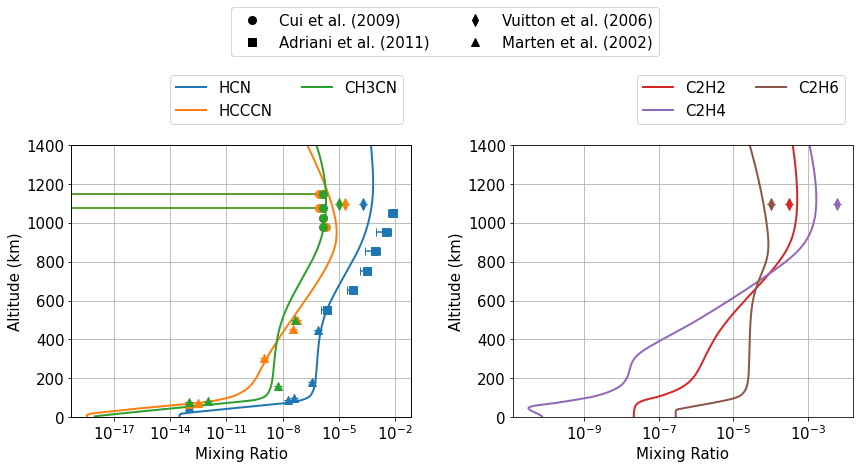

In [16]:
plt.rcParams.update({'font.size': 15})
fig,[ax,ax1] = plt.subplots(1,2,figsize=[14,5])
fig.patch.set_facecolor("w")

sol = pc.mole_fraction_dict()

species = ['HCN','HCCCN','CH3CN']
markers = ['o','s','d','^']
citations = []
for i,sp in enumerate(species):
    ax.plot(sol[sp],sol['alt'],label=sp,lw=2)
    entry = retrieve_species(sp,titan)
    for a in entry:    
        citations.append(a['citation'])
    
citations = list(set(citations))
cit = {citations[i]: markers[i] for i in range(len(citations))}
for i,sp in enumerate(species):
    entry = retrieve_species(sp,titan)
    for j,en in enumerate(entry):
        ax.errorbar(en['mix'],en['alt'],xerr = en['mix-err'],yerr = en['mix-err'],\
                    c='C'+str(i),marker=cit[en['citation']],ls='',capsize=4,ms=8)

ax2 = ax.twinx()
for c in citations:
    ax2.errorbar([],[],\
                    c='k',marker=cit[c],ls='',capsize=4,ms=8,label=c)
ax2.set_yticks([])
    
ax.grid()
ax.set_ylim(0,1400)
ax.set_xscale('log')
ax.legend(ncol=2,bbox_to_anchor=(1,1.05),loc='lower right')
ax2.legend(ncol=2,bbox_to_anchor=(1.1,1.3),loc='lower center')
ax.set_xlabel('Mixing Ratio')
ax.set_ylabel('Altitude (km)')

species = ['C2H2','C2H4','C2H6']
for i,sp in enumerate(species):
    ax1.plot(sol[sp],sol['alt'],'C'+str(i+3),label=sp,lw=2)
    entry = retrieve_species(sp,titan)
    for j,en in enumerate(entry):
        ax1.errorbar(en['mix'],en['alt'],xerr = en['mix-err'],yerr = en['mix-err'],\
                    c='C'+str(i+3),marker=cit[en['citation']],ls='',capsize=4,ms=8)

ax1.grid()
ax1.set_ylim(0,1400)
ax1.set_xscale('log')
ax1.legend(ncol=2,bbox_to_anchor=(1,1.05),loc='lower right')
ax1.set_xlabel('Mixing Ratio')
ax1.set_ylabel('Altitude (km)')

plt.subplots_adjust(wspace=.3)
    
plt.show()

# Saturn

In [17]:
fil = open("planetary_atmosphere_observations/saturn.yaml",'r')
saturn = yaml.load(fil)
fil.close()

In [18]:
pc = Atmosphere(zahnle_earth,\
                "../templates/Saturn/settings_Saturn.yaml",\
                "../templates/ModernEarth/Sun_now.txt",\
                "../templates/Saturn/atmosphere_Saturn.txt")

In [19]:
pc.initialize_stepper(pc.wrk.usol)
tn = 0
while tn<1e17:
    tn = pc.step()
pc.destroy_stepper()

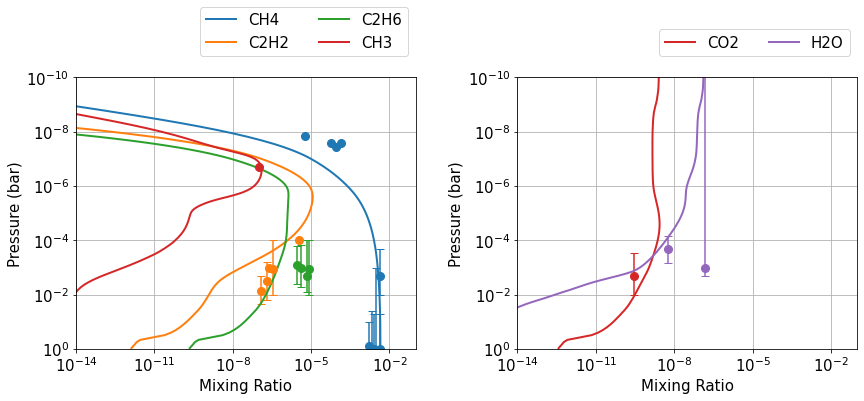

In [22]:
plt.rcParams.update({'font.size': 15})
fig,[ax,ax1] = plt.subplots(1,2,figsize=[14,5])
fig.patch.set_facecolor("w")

sol = pc.mole_fraction_dict()

species = ['CH4','C2H2','C2H6','CH3']
markers = ['o','s','d','^']
citations = []
for i,sp in enumerate(species):
    ax.plot(sol[sp],pc.wrk.pressure/1e6,label=sp,lw=2)
    en = retrieve_species(sp,saturn)[0]
    ax.errorbar(en['mix'],en['P'],xerr = en['mix-err'],yerr = en['P-err'],\
                    c='C'+str(i),marker='o',ls='',capsize=4,ms=8)
    
ax.grid()
ax.set_yscale('log')
ax.set_ylim(1,1e-10)
ax.set_xlim(1e-14,1e-1)
ax.set_xscale('log')
ax.legend(ncol=2,bbox_to_anchor=(1,1.05),loc='lower right')
ax.set_xlabel('Mixing Ratio')
ax.set_ylabel('Pressure (bar)')

species = ['CO2','H2O']
for i,sp in enumerate(species):
    ax1.plot(sol[sp],pc.wrk.pressure/1e6,'C'+str(i+3),label=sp,lw=2)
    en = retrieve_species(sp,saturn)[0]
    ax1.errorbar(en['mix'],en['P'],xerr = en['mix-err'],yerr = en['P-err'],\
                    c='C'+str(i+3),marker='o',ls='',capsize=4,ms=8)
    
ax1.grid()
ax1.set_yscale('log')
ax1.set_ylim(1,1e-10)
ax1.set_xlim(1e-14,1e-1)
ax1.set_xscale('log')
ax1.legend(ncol=2,bbox_to_anchor=(1,1.05),loc='lower right')
ax1.set_xlabel('Mixing Ratio')
ax1.set_ylabel('Pressure (bar)')

plt.subplots_adjust(wspace=.3)
    
plt.show()